# Pipeline Step 5: Train and evaluate the model 

In [1]:
# Referred to Keras Documentation for help. (https://keras.io/getting-started/sequential-model-guide/)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the training sequences
x_all = np.load('x_complete_12.npy')
y_all = np.load('y_complete_12.npy')

In [3]:
x_all = np.log(x_all[-200000:])
y_all = np.log(y_all[-200000:])

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.20)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
drop_prob = 0.30
model = Sequential()
model.add(Conv1D(32, 3, activation='linear', input_shape=(36, 1),
                 kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Dropout(drop_prob))
model.add(Conv1D(32, 5, activation='linear', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Dropout(drop_prob))
model.add(Flatten())
model.add(Dense(128, activation='linear', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Dropout(drop_prob))
# model.add(Dense(128, activation='linear', kernel_initializer='glorot_normal'))
# #model.add(BatchNormalization())
# model.add(Dropout(drop_prob))
model.add(Dense(64, activation='linear', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Dropout(drop_prob))
model.add(Dense(32, activation='linear', kernel_initializer='glorot_normal'))
#model.add(BatchNormalization())
model.add(Dropout(drop_prob))
model.add(Dense(1, activation='linear', kernel_initializer='glorot_normal'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

Using TensorFlow backend.


In [6]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=1, validation_data=(x_test, y_test))

Train on 160000 samples, validate on 40000 samples
Epoch 1/1
160000/160000 [==============================] - 36s - loss: 2.5627 - mean_squared_error: 2.5627 - mean_absolute_error: 1.2025 - val_loss: 0.3796 - val_mean_squared_error: 0.3796 - val_mean_absolute_error: 0.4411


In [7]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_test, y_test))

Train on 160000 samples, validate on 40000 samples
Epoch 1/10
160000/160000 [==============================] - 31s - loss: 1.0716 - mean_squared_error: 1.0716 - mean_absolute_error: 0.8035 - val_loss: 0.3377 - val_mean_squared_error: 0.3377 - val_mean_absolute_error: 0.3973
Epoch 2/10
160000/160000 [==============================] - 33s - loss: 0.8475 - mean_squared_error: 0.8475 - mean_absolute_error: 0.7068 - val_loss: 0.3941 - val_mean_squared_error: 0.3941 - val_mean_absolute_error: 0.4686
Epoch 3/10
160000/160000 [==============================] - 40s - loss: 0.7513 - mean_squared_error: 0.7513 - mean_absolute_error: 0.6593 - val_loss: 0.3174 - val_mean_squared_error: 0.3174 - val_mean_absolute_error: 0.3556
Epoch 4/10
160000/160000 [==============================] - 34s - loss: 0.6902 - mean_squared_error: 0.6902 - mean_absolute_error: 0.6272 - val_loss: 0.3081 - val_mean_squared_error: 0.3081 - val_mean_absolute_error: 0.3311
Epoch 5/10
160000/160000 [===========================

In [8]:
y_pred = model.predict(x_test)

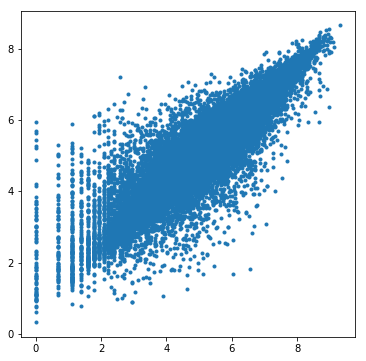

In [10]:
plt.figure(figsize=(6,6))
plt.plot(y_test, y_pred, '.');

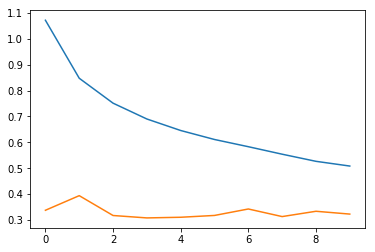

In [11]:
plt.plot(hist.history['loss']);
plt.plot(hist.history['val_loss']);